In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pprint import pprint
import pandas as pd
import os
import datetime
import logging

In [2]:
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

ModuleNotFoundError: No module named 'radcad'

In [3]:
from experiments.utils import save_to_HDF5
from experiments.system_model_v3.post_process import post_process_results

ModuleNotFoundError: No module named 'experiments'

In [4]:
from models.system_model_v3.model.partial_state_update_blocks import partial_state_update_blocks
from models.system_model_v3.model.params.init import params
from models.system_model_v3.model.state_variables.init import state_variables
from models.constants import RAY

ModuleNotFoundError: No module named 'models'

## Setup

In [18]:
os.environ['NUMEXPR_MAX_THREADS'] = '8'
pd.options.plotting.backend = "plotly"

# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.debug("Test logging")

In [28]:
output_directory = 'experiments/system_model_v3/experiment_recommendation_analysis'

## Experiment Configuration

In [21]:
SIMULATION_TIMESTEPS = 24 * 30 * 12
MONTE_CARLO_RUNS = 5

In [23]:
# Override parameters
params_override = {
    'controller_enabled': [True],
    'kp': [2e-07, 1e-6, 2e-07, 1e-6, 2e-07*3, 2e-07*3],
    'ki': [-5.000000e-09, -5.000000e-09, 0, 0, -5.000000e-09, 0],
    'control_period': [3600 * 4], # seconds; must be multiple of cumulative time
    'liquidity_demand_shock': [False],
    'liquidation_ratio': [1.45],
    'liquidity_demand_enabled': [True],
    'alpha': [0.999*RAY], # in 1/RAY
    'interest_rate': [1.03],
    'arbitrageur_considers_liquidation_ratio': [True],
    'rescale_target_price': [True],
}
params.update(params_override)

## Experiment Execution

In [24]:
model = Model(
    initial_state=state_variables,
    state_update_blocks=partial_state_update_blocks,
    params=params
)
simulation = Simulation(model=model, timesteps=SIMULATION_TIMESTEPS, runs=MONTE_CARLO_RUNS)

experiment = Experiment([simulation])
experiment.engine = Engine(
    backend=Backend.PATHOS,
    raise_exceptions=False,
    deepcopy=False,
    processes=8,
    drop_substeps=True,
)

# now = datetime.datetime.now()
# experiment.after_experiment = lambda experiment: save_to_HDF5(experiment, output_directory + '/experiment_results.hdf5', 'results', now)

raw_results = experiment.run()
results = pd.DataFrame(raw_results)
results

Traceback (most recent call last):
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 95, in single_run
    _single_run(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 65, in _single_run
    signals: dict = reduce_signals(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in reduce_signals
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in <lambda>
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/models/system_model_v3/model/parts/debt_market.py", line 239, in p_rebalance_cdps
    if not ETH_delta <= ETH_balance: raise failure.InvalidSecondaryMa

Traceback (most recent call last):
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 95, in single_run
    _single_run(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 65, in _single_run
    signals: dict = reduce_signals(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in reduce_signals
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in <lambda>
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/models/system_model_v3/model/parts/debt_market.py", line 239, in p_rebalance_cdps
    if not ETH_delta <= ETH_balance: raise failure.InvalidSecondaryMa

Traceback (most recent call last):
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 95, in single_run
    _single_run(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 65, in _single_run
    signals: dict = reduce_signals(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in reduce_signals
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in <lambda>
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/models/system_model_v3/model/parts/debt_market.py", line 238, in p_rebalance_cdps
    if not ETH_delta >= 0: raise failure.InvalidSecondaryMarketDeltaE

Traceback (most recent call last):
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 95, in single_run
    _single_run(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 65, in _single_run
    signals: dict = reduce_signals(
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in reduce_signals
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/radcad/core.py", line 150, in <lambda>
    policy_results: [dict] = list(map(lambda function: function(params, substep, result, substate), psu["policies"].values()))
  File "/home/bscholtz/workspace/reflexer/models/system_model_v3/model/parts/debt_market.py", line 238, in p_rebalance_cdps
    if not ETH_delta >= 0: raise failure.InvalidSecondaryMarketDeltaE

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1.000000,1.000000,...,1.000000e+07,106777.606153,1.000000e+07,None,0,0,1,0,0,NaN
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,291.208252,906.674484,453.837242,...,1.450091e+07,73703.760510,1.000000e+07,None,0,0,1,18,1,NaN
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,292.287792,-326.024615,63.906314,...,9.970618e+06,107288.025922,9.999775e+06,None,0,0,1,18,2,NaN
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,289.343698,209.658450,136.782382,...,1.000779e+07,106890.741521,9.999775e+06,None,0,0,1,18,3,NaN
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,286.827771,-79.844839,28.468771,...,9.906911e+06,107982.421498,9.999775e+06,None,0,0,1,18,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256502,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31089600,2017-12-26 20:00:00,0,272.355718,-122.338962,-53.999663,...,3.647351e+06,10717.595745,1.767210e+06,None,0,5,5,18,8636,NaN
256503,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31093200,2017-12-26 21:00:00,0,270.880446,5.240647,-24.379508,...,3.655694e+06,10693.209050,1.767210e+06,None,0,5,5,18,8637,NaN
256504,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31096800,2017-12-26 22:00:00,0,273.601111,10092.235218,5033.927855,...,3.583827e+06,10968.687193,1.772089e+06,None,0,5,5,18,8638,NaN
256505,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31100400,2017-12-26 23:00:00,0,272.688007,-102.864854,2465.531500,...,3.770206e+06,10427.403940,1.772038e+06,<models.system_model_v3.model.parts.uniswap_or...,0,5,5,18,8639,NaN


## Post Processing

In [26]:
def drop_columns(df):
    df.drop(
        ['events', 'uniswap_oracle', 'w_1', 'w_2', 'w_3', 'interest_wiped', 'interest_bitten', 'accrued_interest', 'interest_dripped', 'rai_bitten', 'eth_bitten', 'cdps', 'blockheight', 'sim_metrics', 'optimal_values', 'cdp_metrics'],
        axis=1,
        inplace=True
    )

In [27]:
df = post_process_results(results, params, set_params=[
    'ki',
    'kp',
    'alpha',
    'liquidation_ratio',
    'controller_enabled',
    'control_period',
    'liquidity_demand_shock',
    'arbitrageur_considers_liquidation_ratio',
    'rescale_target_price'
])
drop_columns(df)
df

Adding new columns
0.024692058563232422
Getting parameter sweep
0.024813175201416016
Assigning parameters to subsets
0.9544095993041992
Creating target_price_scaled
0.959550142288208


,timedelta,cumulative_time,timestamp,eth_price,liquidity_demand,liquidity_demand_mean,eth_collateral,eth_locked,eth_freed,principal_debt,...,ki,kp,alpha,liquidation_ratio,controller_enabled,control_period,liquidity_demand_shock,arbitrageur_considers_liquidation_ratio,rescale_target_price,target_price_scaled
0,0,0,2017-01-01 00:00:00,294.069151,1.000000,1.000000,154827.528922,154827.528922,0.000000,1.000000e+07,...,-5.000000e-09,2.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,4.553000
1,3600,3600,2017-01-01 01:00:00,291.208252,906.674484,453.837242,154827.528922,154827.528922,0.000000,1.450000e+07,...,-5.000000e-09,2.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,3.140000
2,3600,7200,2017-01-01 02:00:00,292.287792,-326.024615,63.906314,107503.536596,154827.528922,47323.992326,9.970037e+06,...,-5.000000e-09,2.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,3.140000
3,3600,10800,2017-01-01 03:00:00,289.343698,209.658450,136.782382,107503.536596,154827.528922,47323.992326,1.000700e+07,...,-5.000000e-09,2.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,3.140000
4,3600,14400,2017-01-01 04:00:00,286.827771,-79.844839,28.468771,107503.536596,154827.528922,47323.992326,9.906201e+06,...,-5.000000e-09,2.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,3.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256502,3600,31089600,2017-12-26 20:00:00,272.355718,-122.338962,-53.999663,28808.652670,174289.135265,145480.482595,1.739931e+07,...,0.000000e+00,6.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,0.450733
256503,3600,31093200,2017-12-26 21:00:00,270.880446,5.240647,-24.379508,28808.652670,174289.135265,145480.482595,1.740764e+07,...,0.000000e+00,6.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,0.450412
256504,3600,31096800,2017-12-26 22:00:00,273.601111,10092.235218,5033.927855,28808.652670,174289.135265,145480.482595,1.732568e+07,...,0.000000e+00,6.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,0.450092
256505,3600,31100400,2017-12-26 23:00:00,272.688007,-102.864854,2465.531500,28808.652670,174289.135265,145480.482595,1.751217e+07,...,0.000000e+00,6.000000e-07,9.990000e+26,1.45,True,14400.0,False,True,True,0.449771


In [29]:
df.to_pickle(f'{output_directory}/processed_results.pickle')

## Experiment Analysis

In [7]:
df = pd.read_pickle(f'{output_directory}/processed_results.pickle')

In [8]:
df[['subset', 'kp', 'ki']].groupby(['subset']).first()

,kp,ki
subset,,
0,2.000000e-07,-5.000000e-09
1,1.000000e-06,-5.000000e-09
2,2.000000e-07,0.000000e+00
3,1.000000e-06,0.000000e+00
4,6.000000e-07,-5.000000e-09
5,6.000000e-07,0.000000e+00


AttributeError: 'Line2D' object has no property 'facet_col'

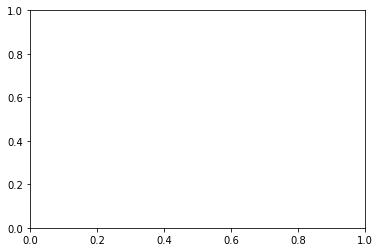

In [9]:
df.query('run == 1').plot(x='timestep', y='market_price', facet_col='subset', facet_col_wrap=3)

In [ ]:
df.query('run == 1 and subset == 0').plot(x='timestep', y=['market_price', 'target_price_scaled'])